# Portfolio with the Maximum Sortino Ratio for the Realty

In [1]:
from pandas_datareader import data
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Establishing Dates
start = "2017-01-01"
end = "2021-12-31"

# Establishing Assets
assets = ['DLF.NS', 'GODREJPROP.NS', 'LODHA.NS','OBEROIRLTY.NS', 'PHOENIXLTD.NS',
         'PRESTIGE.NS', 'BRIGADE.NS', 'IBREALEST.NS', 'SOBHA.NS', 'SUNTECK.NS']

#252 trading days in a year
N = 252

#1% risk free rate
rf =0.02

# Creating an empty dataframe
df_prices = pd.DataFrame()

# Getting the "Adj Close" data from Yahoo Finance by defining a function
# This function lists the price data as daily percent change 
def YahooData(dataframe, assets_list, start_date, end_date):
    for i in assets_list:
        dataframe[i] = data.DataReader(i, data_source = "yahoo", start=start_date, end=end_date)['Adj Close']
    return dataframe

# Running the function that we just made and saving the results to the DataFrame
df = YahooData(df_prices, assets, start, end)

In [3]:
df.to_csv("realty_1.csv")

In [2]:
df = pd.read_csv("realty.csv", index_col=0)

In [3]:
df.head()

DLF.NS  GODREJPROP.NS  OBEROIRLTY.NS  PHOENIXLTD.NS  \
Date                                                                  
2017-01-02  113.124908     313.700012     308.031677     374.300690   
2017-01-03  113.458481     321.200012     306.352783     372.575806   
2017-01-04  119.605545     323.649994     306.500916     370.505920   
2017-01-05  120.701515     325.000000     309.414337     369.224609   
2017-01-06  120.606232     316.149994     301.859192     360.846588   

            PRESTIGE.NS  BRIGADE.NS  IBREALEST.NS    SOBHA.NS  SUNTECK.NS  
Date                                                                       
2017-01-02   164.476974   98.435265     75.800003  233.762177  109.473137  
2017-01-03   165.109589   99.438705     76.050003  237.980408  115.256805  
2017-01-04   166.618134   98.791313     80.300003  241.410568  120.795403  
2017-01-05   168.564590   99.050270     79.250000  243.960022  120.035683  
2017-01-06   167.688675   98.856064     79.699997  247.065735  119.128922

In [4]:
# Calculating Log Return
df = np.log(df/df.shift(1))

# Dropping the first row because it's N/A
df = df.dropna()

# Viewing df head
df

DLF.NS  GODREJPROP.NS  OBEROIRLTY.NS  PHOENIXLTD.NS  \
Date                                                                
2017-01-03  0.002944       0.023627      -0.005465      -0.004619   
2017-01-04  0.052762       0.007599       0.000483      -0.005571   
2017-01-05  0.009121       0.004163       0.009461      -0.003464   
2017-01-06 -0.000790      -0.027608      -0.024721      -0.022952   
2017-01-09 -0.000395       0.020661      -0.000982       0.007212   
...              ...            ...            ...            ...   
2021-12-27  0.007872       0.006052       0.024969      -0.003658   
2021-12-28  0.008329       0.008632       0.001157       0.032161   
2021-12-29 -0.000259       0.001400       0.001733      -0.036135   
2021-12-30 -0.016996      -0.009679      -0.022886      -0.004597   
2021-12-31  0.029236       0.016890       0.017736      -0.002078   

            PRESTIGE.NS  BRIGADE.NS  IBREALEST.NS  SOBHA.NS  SUNTECK.NS  
Date                                                                     
2017-01-03     0.003839    0.010142      0.003293  0.017884    0.051484  
2017-01-04     0.009095   -0.006532      0.054379  0.014311    0.046935  
2017-01-05     0.011614    0.002618     -0.013162  0.010505   -0.006309  
2017-01-06    -0.005210   -0.001963      0.005662  0.012650   -0.007583  
2017-01-09     0.049260    0.017527      0.013088 -0.007722    0.000000  
...                 ...         ...           ...       ...         ...  
2021-12-27     0.021483   -0.007313     -0.030539 -0.005477    0.084667  
2021-12-28     0.001674    0.003257      0.013022  0.018161    0.023263  
2021-12-29    -0.008713   -0.003971      0.014722  0.002382   -0.028982  
2021-12-30    -0.016478    0.017796     -0.025190  0.004634    0.034134  
2021-12-31     0.017637   -0.017388      0.005723  0.009594   -0.009518  

[1235 rows x 9 columns]

In [5]:
assets = ['DLF.NS', 'GODREJPROP.NS', 'OBEROIRLTY.NS', 'PHOENIXLTD.NS',
         'PRESTIGE.NS', 'BRIGADE.NS', 'IBREALEST.NS', 'SOBHA.NS', 'SUNTECK.NS']
# Creating 10000 random simulations of each portfolio weight configuration
num_runs = 10000 # number of rows/iterations

# Creating a Matrix with 10000 rows, with each row representing a random portfolio:
    #first 3 columns are Mean Returns, Standard Deviation, and Sortino Ratio
    # remaining columns are each assets random weight within that random portfolio
result = np.zeros((num_runs,(len(assets)+5)))
result

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
df.shape

(1235, 9)

In [7]:
df.head()

DLF.NS  GODREJPROP.NS  OBEROIRLTY.NS  PHOENIXLTD.NS  \
Date                                                                
2017-01-03  0.002944       0.023627      -0.005465      -0.004619   
2017-01-04  0.052762       0.007599       0.000483      -0.005571   
2017-01-05  0.009121       0.004163       0.009461      -0.003464   
2017-01-06 -0.000790      -0.027608      -0.024721      -0.022952   
2017-01-09 -0.000395       0.020661      -0.000982       0.007212   

            PRESTIGE.NS  BRIGADE.NS  IBREALEST.NS  SOBHA.NS  SUNTECK.NS  
Date                                                                     
2017-01-03     0.003839    0.010142      0.003293  0.017884    0.051484  
2017-01-04     0.009095   -0.006532      0.054379  0.014311    0.046935  
2017-01-05     0.011614    0.002618     -0.013162  0.010505   -0.006309  
2017-01-06    -0.005210   -0.001963      0.005662  0.012650   -0.007583  
2017-01-09     0.049260    0.017527      0.013088 -0.007722    0.000000

In [8]:
df_training = df[0:987]
df_training.columns

Index(['DLF.NS', 'GODREJPROP.NS', 'OBEROIRLTY.NS', 'PHOENIXLTD.NS',
       'PRESTIGE.NS', 'BRIGADE.NS', 'IBREALEST.NS', 'SOBHA.NS', 'SUNTECK.NS'],
      dtype='object')

In [9]:
df_training.shape

(987, 9)

In [10]:
df_training.tail()

DLF.NS  GODREJPROP.NS  OBEROIRLTY.NS  PHOENIXLTD.NS  \
Date                                                                
2020-12-24 -0.012089      -0.008068      -0.038088       0.010213   
2020-12-28  0.030919       0.043115       0.008125      -0.007023   
2020-12-29 -0.007533      -0.013537       0.017518       0.024699   
2020-12-30  0.019256      -0.008075       0.037493       0.008952   
2020-12-31 -0.013225       0.027179       0.026840       0.014959   

            PRESTIGE.NS  BRIGADE.NS  IBREALEST.NS  SOBHA.NS  SUNTECK.NS  
Date                                                                     
2020-12-24     0.002816    0.025603      0.018106  0.031944    0.056175  
2020-12-28     0.020960   -0.000809      0.078289  0.044882   -0.000286  
2020-12-29    -0.015539   -0.008741     -0.022589  0.005629   -0.000429  
2020-12-30    -0.012381    0.004888      0.034641  0.070956    0.018854  
2020-12-31     0.004520    0.012116      0.035917  0.080706   -0.023012

In [11]:
df_test= df[987:]
df_test.head()

DLF.NS  GODREJPROP.NS  OBEROIRLTY.NS  PHOENIXLTD.NS  \
Date                                                                
2021-01-01  0.023346      -0.003427       0.011419       0.013975   
2021-01-04  0.024657      -0.014148       0.000000      -0.015202   
2021-01-05 -0.010493      -0.000426      -0.004841      -0.012683   
2021-01-06 -0.002900       0.037672       0.000511       0.004572   
2021-01-07  0.017885      -0.005355       0.003653      -0.018745   

            PRESTIGE.NS  BRIGADE.NS  IBREALEST.NS  SOBHA.NS  SUNTECK.NS  
Date                                                                     
2021-01-01     0.002627    0.001204     -0.019036 -0.020466    0.020763  
2021-01-04     0.022789    0.013145      0.003095 -0.011263   -0.006920  
2021-01-05     0.008573    0.017262     -0.025033  0.034980    0.007483  
2021-01-06     0.020137   -0.022221     -0.006357 -0.012944   -0.023196  
2021-01-07     0.006034    0.026490      0.132973  0.074473    0.026986

In [12]:
df_test.shape

(248, 9)

In [15]:
#df = df.copy()
for i in range(num_runs):
    
    # randomized weights
    weights = np.array(np.random.random(len(assets))) 
    #Rebalance w/ constraints (SUM of all weights CANNOT BE > 1)
    weights = weights/np.sum(weights)
    
    # daily return of the portfolio based on a given set of weights
    df_training['portfolio_ret'] = df_training.iloc[:,0]*weights[0]+df_training.iloc[:,1]*weights[1]+df_training.iloc[:,2]*weights[2]
    
    # Calculating Mean
    E = df_training['portfolio_ret'].mean()
    # Annualizing Mean
    E_AN = E * N
    
    # Calculating Downside Standard Deviation
    mean = E * N -rf
    std_neg = df_training['portfolio_ret'][df_training['portfolio_ret']<0].std()*np.sqrt(N)
    
    
    # Calculating Upside Standard Deviation
    std_pos = df_training['portfolio_ret'][df_training['portfolio_ret']>=0].std()*np.sqrt(N)
    
    # Calculating Volatility Skewness
    VS = std_pos/std_neg
    
    # Sortino
    Sortino = mean/std_neg
   
    # Populating the 'result' array with the required values: Mean, SD, Sharpe followed by the weights                   
    result[i,0] = E_AN
    result[i,1] = std_neg
    result[i,2] = std_pos
    result[i,3] = VS
    result[i,4] = Sortino
    
    for j in range(len(assets)):
        result[i,j+5]= weights[j]

In [16]:
# Converting 'result' into a DataFrame

columns = ['Mean','Downside SD', 'Upside SD', 'Volatility Skewness', 'Sortino'] + assets

result = pd.DataFrame(result,columns=columns)
result

Mean  Downside SD  Upside SD  Volatility Skewness   Sortino  \
0     0.076374     0.067431   0.069845             1.035793  0.836022   
1     0.074367     0.079991   0.070428             0.880441  0.679668   
2     0.062450     0.062896   0.074752             1.188495  0.674919   
3     0.100330     0.082775   0.086268             1.042201  0.970457   
4     0.071268     0.062808   0.069258             1.102701  0.816267   
...        ...          ...        ...                  ...       ...   
9995  0.073463     0.068595   0.067087             0.978015  0.779401   
9996  0.116554     0.104812   0.097648             0.931646  0.921207   
9997  0.094243     0.085990   0.078804             0.916434  0.863386   
9998  0.082697     0.080379   0.070808             0.880924  0.780026   
9999  0.105681     0.106443   0.092830             0.872111  0.804946   

        DLF.NS  GODREJPROP.NS  OBEROIRLTY.NS  PHOENIXLTD.NS  PRESTIGE.NS  \
0     0.032244       0.118281       0.151026       0.190091     0.137669   
1     0.162773       0.114453       0.001609       0.333294     0.141126   
2     0.006280       0.071149       0.206777       0.143370     0.115089   
3     0.014747       0.188290       0.151080       0.159483     0.031767   
4     0.009285       0.110517       0.163887       0.184264     0.000767   
...        ...            ...            ...            ...          ...   
9995  0.061499       0.101004       0.141480       0.126241     0.042700   
9996  0.137332       0.219680       0.038627       0.077829     0.195565   
9997  0.100173       0.150454       0.108019       0.082287     0.101800   
9998  0.117559       0.119536       0.091253       0.135909     0.129553   
9999  0.163423       0.140055       0.132037       0.052354     0.082651   

      BRIGADE.NS  IBREALEST.NS  SOBHA.NS  SUNTECK.NS  
0       0.001458      0.137520  0.122514    0.109197  
1       0.206932      0.016416  0.002737    0.020660  
2       0.053180      0.244529  0.025817    0.133808  
3       0.099155      0.095468  0.051056    0.208954  
4       0.106870      0.190084  0.052393    0.181932  
...          ...           ...       ...         ...  
9995    0.114531      0.159036  0.167837    0.085672  
9996    0.050959      0.100612  0.084540    0.094855  
9997    0.110819      0.128953  0.101393    0.116101  
9998    0.124029      0.076035  0.166807    0.039320  
9999    0.099016      0.067491  0.106557    0.156416  

[10000 rows x 14 columns]

In [17]:
result.head()

Mean  Downside SD  Upside SD  Volatility Skewness   Sortino    DLF.NS  \
0  0.076374     0.067431   0.069845             1.035793  0.836022  0.032244   
1  0.074367     0.079991   0.070428             0.880441  0.679668  0.162773   
2  0.062450     0.062896   0.074752             1.188495  0.674919  0.006280   
3  0.100330     0.082775   0.086268             1.042201  0.970457  0.014747   
4  0.071268     0.062808   0.069258             1.102701  0.816267  0.009285   

   GODREJPROP.NS  OBEROIRLTY.NS  PHOENIXLTD.NS  PRESTIGE.NS  BRIGADE.NS  \
0       0.118281       0.151026       0.190091     0.137669    0.001458   
1       0.114453       0.001609       0.333294     0.141126    0.206932   
2       0.071149       0.206777       0.143370     0.115089    0.053180   
3       0.188290       0.151080       0.159483     0.031767    0.099155   
4       0.110517       0.163887       0.184264     0.000767    0.106870   

   IBREALEST.NS  SOBHA.NS  SUNTECK.NS  
0      0.137520  0.122514    0.109197  
1      0.016416  0.002737    0.020660  
2      0.244529  0.025817    0.133808  
3      0.095468  0.051056    0.208954  
4      0.190084  0.052393    0.181932

In [13]:
df.head()

DLF.NS  GODREJPROP.NS  OBEROIRLTY.NS  PHOENIXLTD.NS  \
Date                                                                
2017-01-03  0.002944       0.023627      -0.005465      -0.004619   
2017-01-04  0.052762       0.007599       0.000483      -0.005571   
2017-01-05  0.009121       0.004163       0.009461      -0.003464   
2017-01-06 -0.000790      -0.027608      -0.024721      -0.022952   
2017-01-09 -0.000395       0.020661      -0.000982       0.007212   

            PRESTIGE.NS  BRIGADE.NS  IBREALEST.NS  SOBHA.NS  SUNTECK.NS  
Date                                                                     
2017-01-03     0.003839    0.010142      0.003293  0.017884    0.051484  
2017-01-04     0.009095   -0.006532      0.054379  0.014311    0.046935  
2017-01-05     0.011614    0.002618     -0.013162  0.010505   -0.006309  
2017-01-06    -0.005210   -0.001963      0.005662  0.012650   -0.007583  
2017-01-09     0.049260    0.017527      0.013088 -0.007722    0.000000

In [14]:
df_training = df[0:987]
df_training.columns

Index(['DLF.NS', 'GODREJPROP.NS', 'OBEROIRLTY.NS', 'PHOENIXLTD.NS',
       'PRESTIGE.NS', 'BRIGADE.NS', 'IBREALEST.NS', 'SOBHA.NS', 'SUNTECK.NS'],
      dtype='object')

In [15]:
df_training.shape

(987, 9)

In [16]:
df_test= df[987:]
df_test.head()

DLF.NS  GODREJPROP.NS  OBEROIRLTY.NS  PHOENIXLTD.NS  \
Date                                                                
2021-01-01  0.023346      -0.003427       0.011419       0.013975   
2021-01-04  0.024657      -0.014148       0.000000      -0.015202   
2021-01-05 -0.010493      -0.000426      -0.004841      -0.012683   
2021-01-06 -0.002900       0.037672       0.000511       0.004572   
2021-01-07  0.017885      -0.005355       0.003653      -0.018745   

            PRESTIGE.NS  BRIGADE.NS  IBREALEST.NS  SOBHA.NS  SUNTECK.NS  
Date                                                                     
2021-01-01     0.002627    0.001204     -0.019036 -0.020466    0.020763  
2021-01-04     0.022789    0.013145      0.003095 -0.011263   -0.006920  
2021-01-05     0.008573    0.017262     -0.025033  0.034980    0.007483  
2021-01-06     0.020137   -0.022221     -0.006357 -0.012944   -0.023196  
2021-01-07     0.006034    0.026490      0.132973  0.074473    0.026986

In [17]:
df_test.shape

(248, 9)

In [23]:
Max_Sortino = result.iloc[result['Sortino'].idxmax()]
Max_Sortino

Mean                   0.173478
Downside SD            0.140255
Upside SD              0.147081
Volatility Skewness    1.048669
Sortino                1.094277
DLF.NS                 0.035733
GODREJPROP.NS          0.411634
OBEROIRLTY.NS          0.045137
PHOENIXLTD.NS          0.084651
PRESTIGE.NS            0.070407
BRIGADE.NS             0.041242
IBREALEST.NS           0.103055
SOBHA.NS               0.096016
SUNTECK.NS             0.112124
Name: 9281, dtype: float64

In [24]:
Min_DSD = result.iloc[result['Downside SD'].idxmin()]
Min_DSD

Mean                   0.007511
Downside SD            0.007712
Upside SD              0.006636
Volatility Skewness    0.860474
Sortino               -1.619405
DLF.NS                 0.012639
GODREJPROP.NS          0.009815
OBEROIRLTY.NS          0.008566
PHOENIXLTD.NS          0.078736
PRESTIGE.NS            0.168919
BRIGADE.NS             0.186743
IBREALEST.NS           0.184708
SOBHA.NS               0.165819
SUNTECK.NS             0.184055
Name: 7043, dtype: float64

In [25]:
plt.figure(figsize=(12,8))
plt.scatter(x=result['Downside SD'],y=result['Mean'],c=result['Sortino'],cmap='viridis')
plt.colorbar(label='Sortino Ratio')
plt.xlabel('Downside Volatility')
plt.ylabel('Return')

plt.title('Maximum Sortino Ratio - IT Sector')
#Plot a red star to highlight position of the portfolio with highest Sortino Ratio
plt.scatter(Max_Sortino[1],Max_Sortino[0],marker=(5,1,0),color='r',s=600)
plt.scatter(Min_DSD[1],Min_DSD[0],marker=(5,1,0),color='b',s=600)

plt.show()

In [18]:
# Portfolio with the maximum Sharpe Ratio
w_raw = [0.0693, 0.2026, 0.0602, 0.2003, 0.0144, 0.2059, 0.0042, 0.0410, 0.2020]
#w_eigen = [i * 100 for i in w_raw]
print(w_raw)

w_1 = pd.DataFrame(w_raw, index = ['DLF.NS', 'GODREJPROP.NS', 'OBEROIRLTY.NS', 'PHOENIXLTD.NS',
         'PRESTIGE.NS', 'BRIGADE.NS', 'IBREALEST.NS', 'SOBHA.NS', 'SUNTECK.NS'])
w_1.columns = ['weights']
w_1

[0.0693, 0.2026, 0.0602, 0.2003, 0.0144, 0.2059, 0.0042, 0.041, 0.202]


weights
DLF.NS          0.0693
GODREJPROP.NS   0.2026
OBEROIRLTY.NS   0.0602
PHOENIXLTD.NS   0.2003
PRESTIGE.NS     0.0144
BRIGADE.NS      0.2059
IBREALEST.NS    0.0042
SOBHA.NS        0.0410
SUNTECK.NS      0.2020

In [19]:
# Portfolio with the maximum Sortino Ratio
w_raw = [0.03573, 0.4116, 0.0451, 0.0847, 0.0704, 0.0412, 0.1031, 0.0960, 0.1121]
#w_eigen = [i * 100 for i in w_raw]
# print(w_raw)

w_2 = pd.DataFrame(w_raw, index = ['DLF.NS', 'GODREJPROP.NS', 'OBEROIRLTY.NS', 'PHOENIXLTD.NS',
         'PRESTIGE.NS', 'BRIGADE.NS', 'IBREALEST.NS', 'SOBHA.NS', 'SUNTECK.NS'])
w_2.columns = ['weights']
w_2

weights
DLF.NS         0.03573
GODREJPROP.NS  0.41160
OBEROIRLTY.NS  0.04510
PHOENIXLTD.NS  0.08470
PRESTIGE.NS    0.07040
BRIGADE.NS     0.04120
IBREALEST.NS   0.10310
SOBHA.NS       0.09600
SUNTECK.NS     0.11210

In [20]:
# Portfolio with the maximum Sortino Ratio
w_raw = [0.0006, 0.3277, 0.0318, 0.1163, 0.0721, 0.0901, 0.0137, 0.2707, 0.0771]
#w_eigen = [i * 100 for i in w_raw]
# print(w_raw)

w_3 = pd.DataFrame(w_raw, index = ['DLF.NS', 'GODREJPROP.NS', 'OBEROIRLTY.NS', 'PHOENIXLTD.NS',
         'PRESTIGE.NS', 'BRIGADE.NS', 'IBREALEST.NS', 'SOBHA.NS', 'SUNTECK.NS'])
w_3.columns = ['weights']
w_3

weights
DLF.NS          0.0006
GODREJPROP.NS   0.3277
OBEROIRLTY.NS   0.0318
PHOENIXLTD.NS   0.1163
PRESTIGE.NS     0.0721
BRIGADE.NS      0.0901
IBREALEST.NS    0.0137
SOBHA.NS        0.2707
SUNTECK.NS      0.0771

In [21]:
frames = [w_1, w_2, w_3]
  
result_1 = pd.concat(frames,axis=1)
#result.rename(columns={"weights": "HRP", "weights": "HERC", "weights": "EIGEN"}, inplace=True)
df_port = result_1.set_axis(['Sharpe Ratio', 'Sortino Ratio', 'Calmar Ratio'], axis=1, inplace=False)
#df3 =df3/100
display(df_port)

Sharpe Ratio  Sortino Ratio  Calmar Ratio
DLF.NS               0.0693        0.03573        0.0006
GODREJPROP.NS        0.2026        0.41160        0.3277
OBEROIRLTY.NS        0.0602        0.04510        0.0318
PHOENIXLTD.NS        0.2003        0.08470        0.1163
PRESTIGE.NS          0.0144        0.07040        0.0721
BRIGADE.NS           0.2059        0.04120        0.0901
IBREALEST.NS         0.0042        0.10310        0.0137
SOBHA.NS             0.0410        0.09600        0.2707
SUNTECK.NS           0.2020        0.11210        0.0771

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(30,20))
ax1.pie(df_port.iloc[:,0], labels= df_port.index, autopct='%.2f', textprops={'fontsize': 15});
ax1.set_title('Portfoio with Max Sharpe Ratio',fontsize = 30)
ax2.pie(df_port.iloc[:,1], labels=df_port.index, autopct='%.2f', textprops={'fontsize': 15});
ax2.set_title('Portfolio with Max Sortino Ratio',fontsize = 30)
ax3.pie(df_port.iloc[:,2], labels=df_port.index, autopct='%.2f', textprops={'fontsize': 15})
ax3.set_title('Portfolio with Max Calmar Ratio', fontsize = 30)
#portfolios.plot.pie(subplots=True, figsize=(20, 10),legend = False);

Text(0.5, 1.0, 'Portfolio with Max Calmar Ratio')

In [24]:
df_training.shape

(987, 9)

In [25]:
Insample_Result=pd.DataFrame(np.dot(df_training, np.array(df_port)), \
                             columns=['Max Sharpe Ratio Portfolio', 'Max Sortino Ratio Portfolio', 'Max Calmar Ratio Portfolio'], index = df_training.index)
OutOfSample_Result=pd.DataFrame(np.dot(df_test,np.array(df_port)), \
                                columns=['Max Sharpe Ratio Portfolio', 'Max Sortino Ratio Portfolio', 'Max Calmar Ratio Portfolio'], index = df_test.index)

In [26]:
Insample_Result.head(20)

Max Sharpe Ratio Portfolio  Max Sortino Ratio Portfolio  \
Date                                                                  
2017-01-03                    0.017027                     0.017708   
2017-01-04                    0.013191                     0.017176   
2017-01-05                    0.001158                     0.002042   
2017-01-06                   -0.013202                    -0.013950   
2017-01-09                    0.009601                     0.013855   
2017-01-10                    0.005489                     0.000920   
2017-01-11                   -0.000533                     0.004499   
2017-01-12                    0.006745                     0.009641   
2017-01-13                   -0.007803                    -0.009063   
2017-01-16                    0.005482                     0.005676   
2017-01-17                    0.001637                     0.001245   
2017-01-18                   -0.003991                     0.000853   
2017-01-19                   -0.004400                    -0.006556   
2017-01-20                   -0.009365                    -0.012046   
2017-01-23                    0.006451                    -0.001739   
2017-01-24                   -0.000122                    -0.000197   
2017-01-25                    0.003053                     0.001713   
2017-01-27                    0.003617                     0.007875   
2017-01-30                   -0.002907                    -0.007072   
2017-01-31                   -0.003270                    -0.001251   

            Max Calmar Ratio Portfolio  
Date                                    
2017-01-03                    0.017080  
2017-01-04                    0.010194  
2017-01-05                    0.004518  
2017-01-06                   -0.010138  
2017-01-09                    0.010798  
2017-01-10                    0.000565  
2017-01-11                   -0.002157  
2017-01-12                    0.008296  
2017-01-13                   -0.003076  
2017-01-16                    0.002825  
2017-01-17                   -0.001195  
2017-01-18                   -0.001725  
2017-01-19                   -0.006431  
2017-01-20                   -0.009181  
2017-01-23                   -0.000236  
2017-01-24                    0.001566  
2017-01-25                   -0.001689  
2017-01-27                    0.008860  
2017-01-30                   -0.007608  
2017-01-31                    0.002595

<AxesSubplot:xlabel='Date', ylabel='Return'>

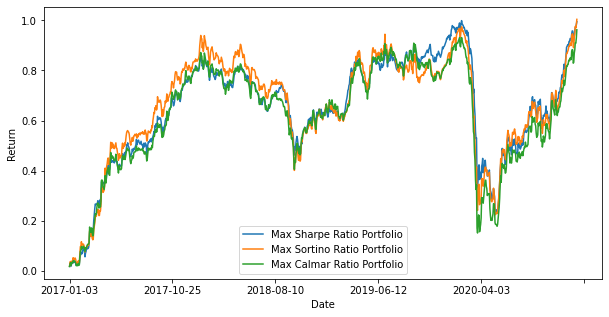

In [27]:
Insample_Result.cumsum().plot(figsize=(10, 5), ylabel = "Return")
OutOfSample_Result.cumsum().plot(figsize=(10, 5), ylabel = "Return")

In [28]:
ret_insample=Insample_Result.mean() * 252
ret_insample

Max Sharpe Ratio Portfolio     0.253952
Max Sortino Ratio Portfolio    0.256358
Max Calmar Ratio Portfolio     0.245727
dtype: float64

In [29]:
ret_out_of_sample = OutOfSample_Result.mean() * 252
ret_out_of_sample

Max Sharpe Ratio Portfolio     0.422961
Max Sortino Ratio Portfolio    0.424092
Max Calmar Ratio Portfolio     0.487140
dtype: float64